In [1]:
import math
import numpy as np
import pandas as pd
from src.knn import KNN, WeightedKNN

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.options.display.max_rows = 999


attributes = ['wordcount', 'titleSentiment', 'sentimentValue']
target = ['starRating']

reviews_sentiment = pd.read_csv('datasets/reviews_sentiment.csv', delimiter=";")

for i, row in reviews_sentiment.iterrows():
    wc = len(row['reviewText'].strip().split(' '))
    if wc != row['wordcount']:
#         print(f"El registro {i} tiene el campo wordcount incorrecto, corrigiendo...")
        reviews_sentiment.at[i,'wordcount'] = wc

# print(sentiments)

# cambiar positivo a 1, negativo a 0.
reviews_sentiment['titleSentiment'].replace('positive', 1, inplace=True)
reviews_sentiment['titleSentiment'].replace('negative', 0, inplace=True)

# quitar los NaNs y verificar que no sea una porcion importante del conjunto de datos
nan_title_sentiment = reviews_sentiment[reviews_sentiment['titleSentiment'].isna()]
nan_text_sentiment = reviews_sentiment[reviews_sentiment['textSentiment'].isna()]
print(f"Cantidad de NaNs en titleSentiment {len(nan_title_sentiment)}")
print(f"Cantidad de registros {len(reviews_sentiment)}")
reviews_sentiment = reviews_sentiment.dropna()
print(f"Cantidad de registros despues de sacar NaNs: {len(reviews_sentiment)}.")

reviews_sentiment = reviews_sentiment[target + attributes]

print(reviews_sentiment)


Cantidad de NaNs en titleSentiment 26
Cantidad de registros 257
Cantidad de registros despues de sacar NaNs: 231.
     starRating  wordcount  titleSentiment  sentimentValue
0             1         20             0.0       -0.486389
1             1          6             0.0       -0.586187
4             1          6             0.0       -0.651784
5             1          8             1.0       -0.720443
6             1         11             1.0       -0.726825
7             1         16             1.0       -0.736769
8             1          3             1.0       -0.765284
9             1         13             0.0       -0.797961
10            1          4             1.0       -0.833488
11            1          9             0.0       -0.838467
12            1          2             1.0       -0.888559
13            1         23             0.0       -1.002696
14            1          7             0.0       -1.083269
15            1         10             1.0       -1.098110
1

In [2]:
# Pregunta a)
print('Los comentarios valorados con 1 estrella, ¿que cantidad promedio de palabras tienen?')

mean = reviews_sentiment[reviews_sentiment['starRating'] == 1]['wordcount'].aggregate('mean')
print(f"El promedio es {round(mean, 2)}")

Los comentarios valorados con 1 estrella, ¿que cantidad promedio de palabras tienen?
El promedio es 8.06


In [3]:
from src.aux_functions import normalize_df

classes = np.array(reviews_sentiment.starRating.unique())

# print(sentiments.star_rating.unique())

labels = np.array(reviews_sentiment.starRating)
# Se normalizan los datos por cada columna
data = np.array(normalize_df(reviews_sentiment[attributes])) # me queda un arreglo de registros con 3 atributos

crossed_validation = 6
batch_size = math.floor(len(data)/crossed_validation)

# valores de precision para cada corrido de validacion cruzada
knn_precisions = np.zeros(crossed_validation)
weight_knn_precisions = np.zeros(crossed_validation)


In [4]:
from src.aux_functions import confusion_matrix
from src.aux_functions import plot_matrix
from src.aux_functions import plot_precision


for i in range(crossed_validation):

    # separo por lotes al conjunto de entrenamiento/testeo para la validacion cruzada
    test_batch = np.array(range(batch_size * i, batch_size * (i + 1), 1))

    # b) Dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba.
    X = np.delete(data, test_batch, axis = 0)
    f_X = np.delete(labels, test_batch, axis = 0)
    Y = data[test_batch[0]:(test_batch[-1] + 1)]
    f_Y = labels[test_batch[0]:(test_batch[-1] + 1)]

    knn = KNN(X, f_X, classes)
    weight_knn = WeightedKNN(X, f_X, classes)

    predictions = knn.batch_classify(Y)
    weight_predictions = weight_knn.batch_classify(Y)
    
#     knn_confusion = confusion_matrix(results, f_Y, classes)
    weight_knn_confusion = confusion_matrix(weight_predictions, f_Y, classes)

#     knn_precisions[i] = knn_confusion.trace()/knn_confusion.sum()
    weight_knn_precisions[i] = weight_knn_confusion.trace()/weight_knn_confusion.sum()
#     plot_matrix(weight_knn_confusion, f'crossed_validation_{crossed_validation}_{i}.png')



step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k
step_k


No handles with labels found to put in legend.


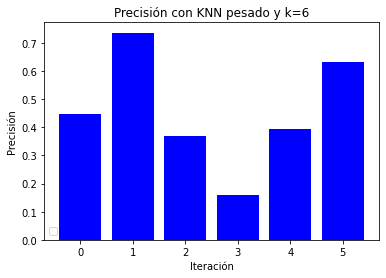

In [5]:
plot_precision(knn_precisions, weight_knn_precisions, crossed_validation, f'crossed_validation_{crossed_validation}.png')

print()
# print(f'Para el KNN pesado, la precision promedio resulto: {w_knn_precisions.mean()} con un valor maximo de: {w_knn_precisions.max()}')